In [1]:
import numpy as np
from scipy.constants import *
from pySLM import *
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import shift
%matplotlib  inline

In [2]:
from scipy.fftpack import fft2, fftshift

In [3]:
plt.rcParams['figure.figsize'] = [20, 15]
plt.rcParams['font.size'] = 20

In [4]:
input_profile = np.load("cylindrical.npy")

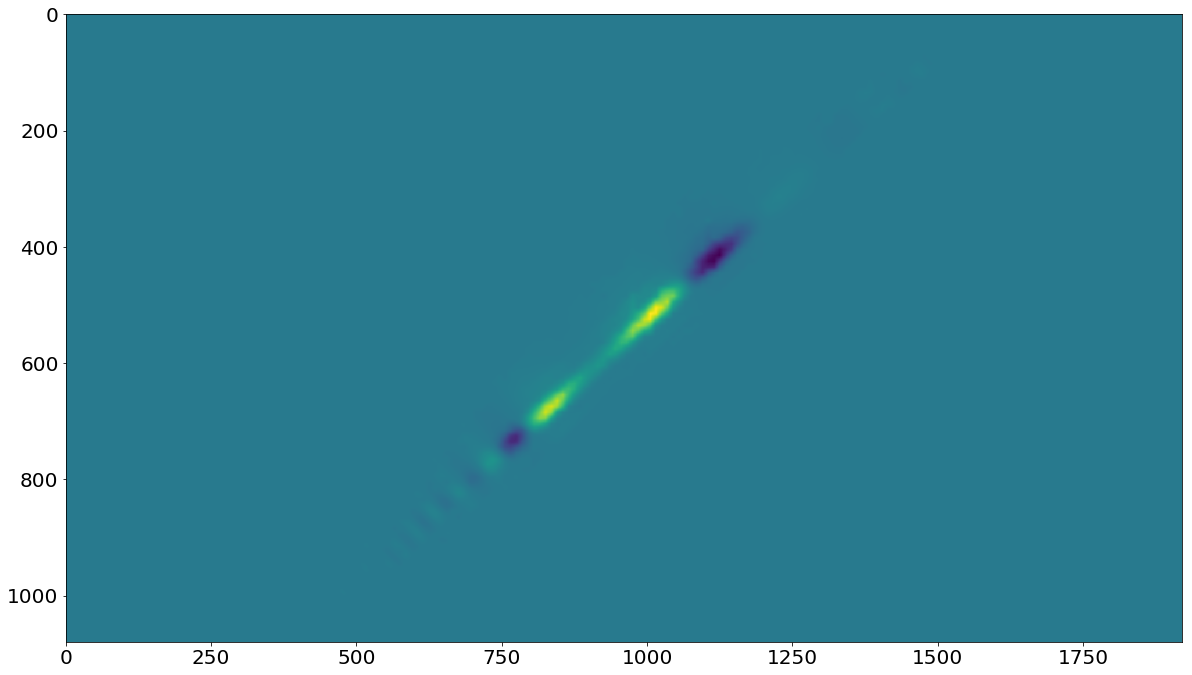

In [5]:
plt.imshow(input_profile.real)

In [64]:
p=2 
dmd = DLP9500(wavelength=369*nano, focal_length=200*milli, periodicity=2, theta=-pi/4, negative_order=True)
sim = DMDSimulation(dmd, padding=0)


In [65]:
xc, yc = sim.first_order_origin

In [66]:
output_profile = ElipicalGaussianTEM(0,0,1,8e-5,6e-6)+ ElipicalGaussianTEM(0,5e-5,1,8e-5,6e-6)+ ElipicalGaussianTEM(0,-1e-4,1,8e-5,6e-6)
output_profile = output_profile.rotate(np.pi/4)

In [75]:
signal_window = ElipicalGaussianTEM(0,0,1,2e-6,4e-5).rotate(np.pi/4)
signal_window = signal_window.translate(-xc, -yc)
signal_window = signal_window(*dmd.image_plane_grid)
signal_window = signal_window > 1e-30

In [ ]:
dmd.calculate_dmd_state(input_profile, output_profile, binarize=True,binarize_method="IFTA", 
                        signal_window=signal_window,N=1000, full_field=False)

In [ ]:
plt.imshow(signal_window)


In [ ]:
sim.propagate_to_image(input_profile)
sim.block_zeroth_order()

In [ ]:
amp = np.abs(sim.image_plane_field)
amp = amp/np.max(amp)
amp_db = 10*np.log10(amp)

In [ ]:
plt.imshow(amp)

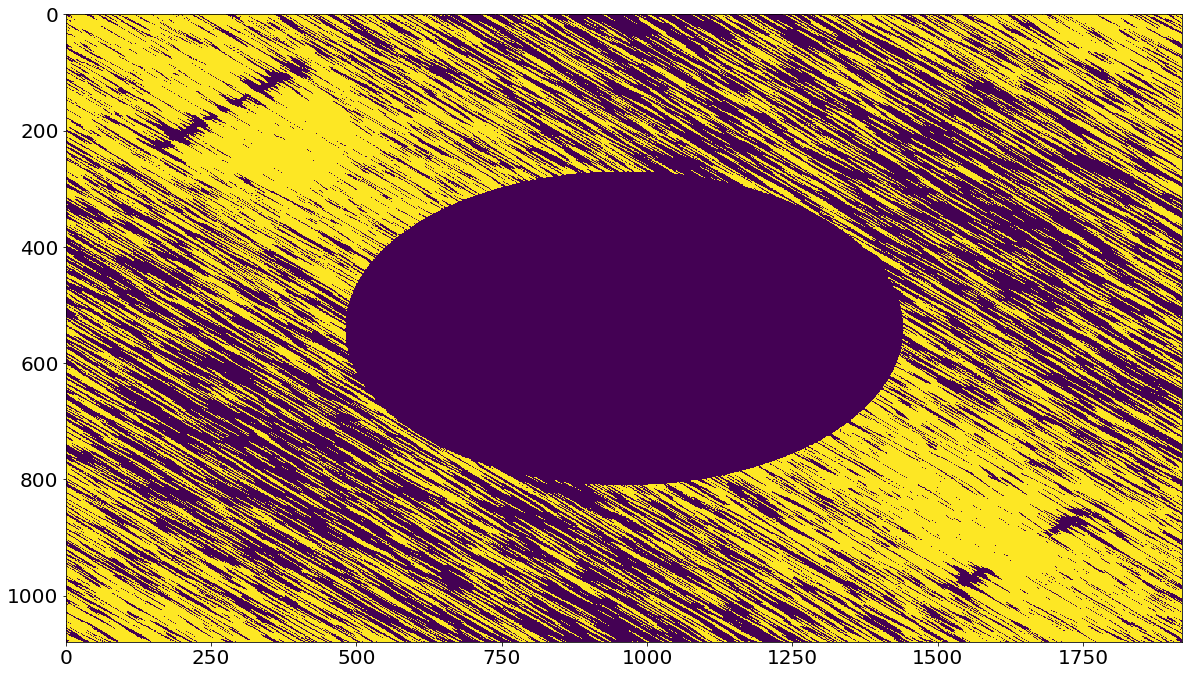

In [81]:
plt.imshow(amp_db>-17)

/home/gilbert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.
/home/gilbert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


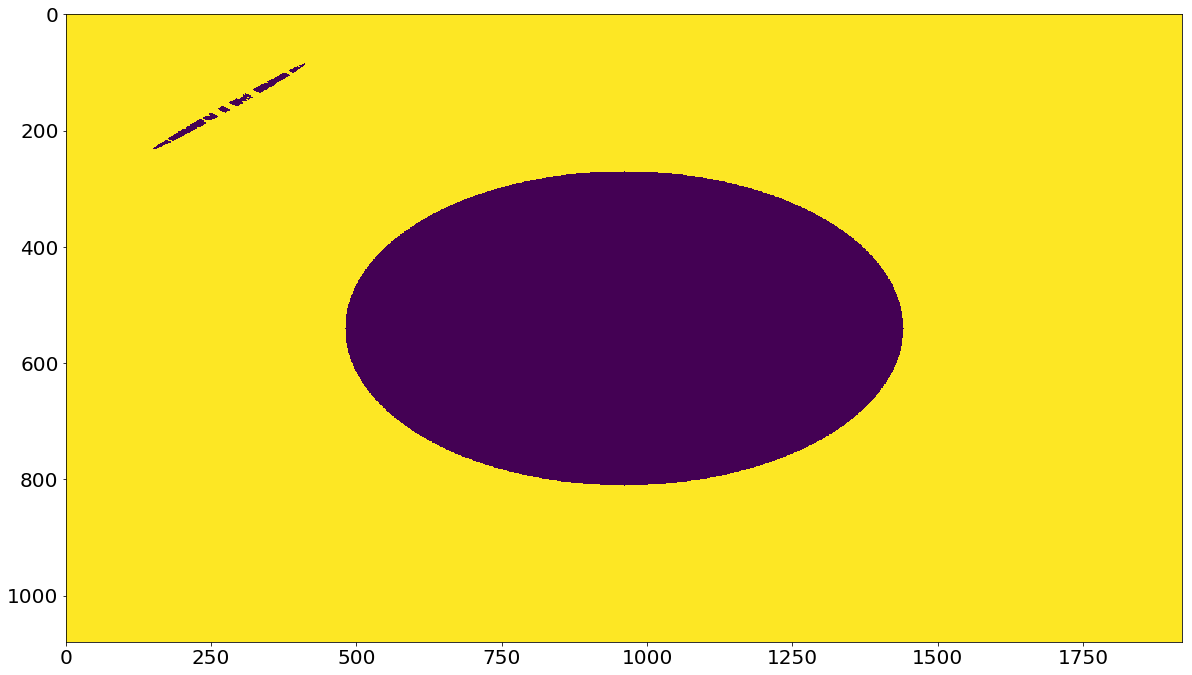

In [82]:
plt.imshow(signal_window*amp_db>-17)